# Segmentation based on the age and the total amount spent(K-means Clustering).

## 1) Import Standard Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load the Dataset

In [36]:
#Read the processed data  csv and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/processed", "sales_combined_data.csv")

retail_df = pd.read_csv(relative_path)
retail_df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Customer_ID.1,...,dummy_40_49,dummy_50_59,dummy_60_plus,gender_dummy,HolidayDummy,Max_Temp,Min_Temp,Mean_Temp,Total_Precip_mm,Product_Category.1
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,CUST001,...,0,0,0,1,1,1.6,-2.3,-0.3,0.0,Beauty
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,CUST002,...,0,0,0,0,0,0.8,-5.4,-2.3,7.2,Clothing
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,CUST003,...,0,1,0,1,0,-0.1,-8.8,-4.5,2.5,Electronics
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,CUST004,...,0,0,0,1,0,24.3,10.7,17.5,0.0,Clothing
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,CUST005,...,0,0,0,1,0,18.6,7.2,12.9,0.0,Beauty


## 3) Define the features

In [37]:
X = retail_df[["Age", "Total_Amount"]]
X

,Age,Total_Amount
0,34,150
1,26,1000
2,50,30
3,37,500
4,30,100
...,...,...
995,62,50
996,52,90
997,23,100
998,36,150


## 4) Standardization

In [38]:
# standarize the x variables using StandardScaler
scaler = StandardScaler()
X[['Age', 'Total_Amount']] = scaler.fit_transform(X[['Age', 'Total_Amount']])
X

C:\Users\srees\AppData\Local\Temp\ipykernel_1644\4250210483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Total_Amount']] = scaler.fit_transform(X[['Age', 'Total_Amount']])


,Age,Total_Amount
0,-0.540565,-0.546704
1,-1.125592,0.971919
2,0.629489,-0.761098
3,-0.321180,0.078611
4,-0.833078,-0.636035
...,...,...
995,1.507029,-0.725366
996,0.775746,-0.653901
997,-1.344977,-0.636035
998,-0.394308,-0.546704


## 5) Data Visualization

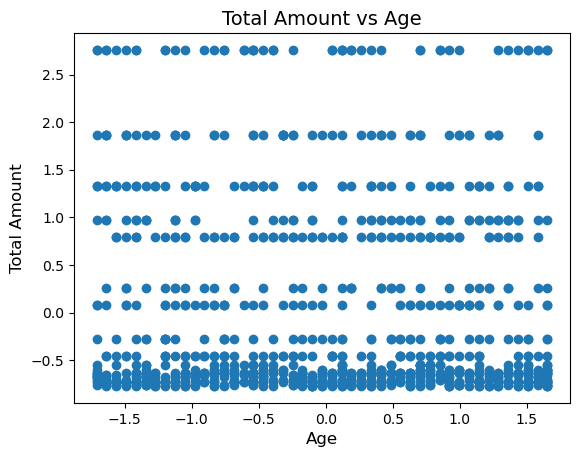

In [39]:
# Scatter plot for Total Amount vs Age
plt.scatter(X['Age'], X['Total_Amount'])

# Adding labels and title
plt.title('Total Amount vs Age', fontsize=14)
plt.ylabel('Total Amount', fontsize=12)
plt.xlabel('Age', fontsize=12)

# Display the plot
plt.show()

## 6) K-means clustering

In [40]:
# Initialize the K-means model
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)

# Fit the model
clusters= kmeans.fit(X)


# Create a copy for clustering and modifictaions
clustered_retail_df = X.copy()

# Assign cluster labels to the original data as a new column
clustered_retail_df["Cluster"] = clusters.labels_
print(clustered_retail_df)

          Age  Total_Amount  Cluster
0   -0.540565     -0.546704        1
1   -1.125592      0.971919        2
2    0.629489     -0.761098        0
3   -0.321180      0.078611        1
4   -0.833078     -0.636035        1
..        ...           ...      ...
995  1.507029     -0.725366        0
996  0.775746     -0.653901        0
997 -1.344977     -0.636035        1
998 -0.394308     -0.546704        1
999  0.410104     -0.600303        0

[1000 rows x 3 columns]


c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## 7) Visualize the clusters

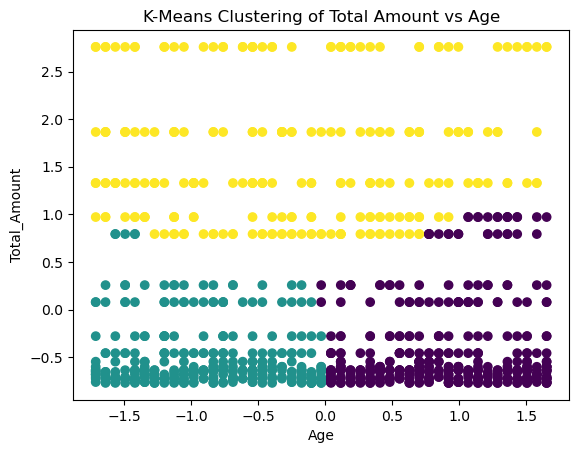

In [41]:
# Plot the clusters
plt.scatter(clustered_retail_df['Age'], clustered_retail_df['Total_Amount'], c=clustered_retail_df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Total_Amount')
plt.title('K-Means Clustering of Total Amount vs Age')
plt.show()

There are three distinct clusters:

1. A younger group with relatively lower spending.
2. An  older group with relatively lower spending.
3. A diverse group across all age ranges with higher spending.

The number of customers in the high-spending group is smaller compared to the low-spending groups.

## 8) Finding the optimal number of clusters(K) by elbow method

In [42]:
## Initialize an empty DataFrame to store the k and WSSD values
clustered_retail_df = pd.DataFrame(columns=["k", "wssd"])

# Loop through values of k from 1 to 10
for k in range(1, 11):
    # Initialize K-means clustering model
    elbow_kmeans = KMeans(n_clusters=k, random_state=0)
    # Fit the initialized model to our data
    elbow_kmeans.fit(X)

    # concat the current k and inertia (WSSD) to the dataframe
    new_row ={"k": k, "wssd": elbow_kmeans.inertia_}
    clustered_retail_df = pd.concat([clustered_retail_df, pd.DataFrame([new_row])], ignore_index=True)

# Convert k to float
clustered_retail_df["k"] = clustered_retail_df["k"].astype(float)

# Display the DataFrame
clustered_retail_df

c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\srees\AppData\Local\Temp\ipykernel_1644\552390.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clustered_retail_df = pd.concat([clustered_retail_df, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

,k,wssd
0,1.0,2000.000000
1,2.0,1185.788125
2,3.0,625.339116
3,4.0,439.694345
4,5.0,378.194866
5,6.0,273.262744
6,7.0,241.554748
7,8.0,207.722885
8,9.0,171.939731
9,10.0,158.125712


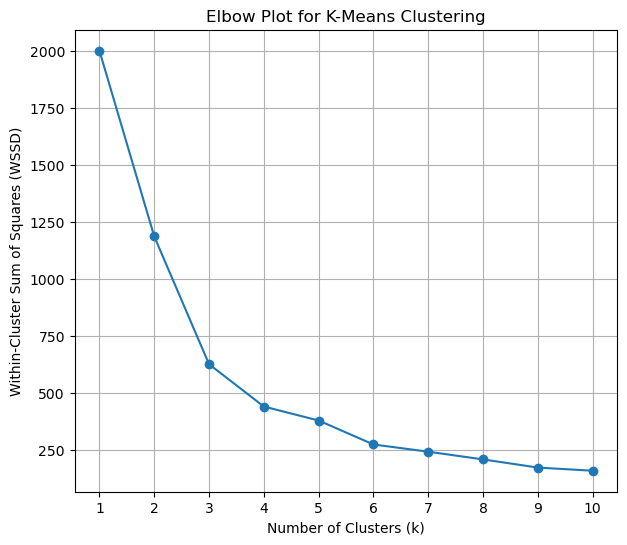

In [45]:
# Create the elbow plot
plt.figure(figsize=(7, 6))
plt.plot(clustered_retail_df['k'], clustered_retail_df['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(clustered_retail_df['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

Three clusters appear to be the best choice because the plot shows a clear "elbow" at this point. This means that adding more clusters beyond three doesn't significantly reduce the WSSD.



## 9) Conclusion

 The identified clusters reveal distinct spending patterns: younger and older groups with relatively lower spending, and a mixed-age group with higher spending. Notably, the high-spending group is smaller compared to the low-spending groups, highlighting a concentration of customers in lower spending categories.
